In [2]:
import pandas as pd
import numpy as np
import utilities as utls
import dataUtils as dutls
import model_utils as mutls
import matplotlib.pyplot as plt

C:\Users\Yang\.conda\envs\test_speedcom\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df=pd.read_csv('temp_cleaned_data.tsv',sep='\t')

In [4]:
prop = utls.compute_properties(df, 'name_smiles',)

In [5]:
df_prop=pd.concat([df, prop],axis=1)

In [6]:
feat = utls.compute_features(df,'name_smiles')

In [20]:
df_prop.describe()

,#,Wavelength,Epsilon,Quantum Yield,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,...,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,142.471910,366.789326,50962.857678,0.172839,316.025052,3.973783,1.307116,2.670412,1.059925,3.411985,...,0.063670,0.509363,0.007491,0.539326,0.378277,0.022472,135.244807,61.879963,2.566697,86.016540
std,88.121041,146.055782,66374.019849,0.264920,199.145074,3.926398,1.987571,3.701755,1.578808,3.404266,...,0.323965,1.005112,0.086386,2.002195,1.583270,0.228308,83.985142,67.365562,3.062763,50.392393
min,1.000000,203.000000,9.000000,0.000000,67.042199,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.640564,0.000000,-8.991400,19.827000
25%,69.500000,251.000000,12900.000000,0.000000,165.552794,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.874835,15.960000,1.141700,46.880000
50%,136.000000,288.000000,27500.000000,0.034000,263.028396,3.000000,0.000000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.874280,46.340000,2.422000,78.298300
75%,205.500000,479.500000,61250.000000,0.235000,443.671566,5.000000,2.000000,4.000000,2.000000,5.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,181.445462,83.690000,3.844100,109.433700
max,339.000000,818.000000,487000.000000,1.000000,1354.567400,28.000000,15.000000,26.000000,10.000000,20.000000,...,3.000000,6.000000,1.000000,10.000000,15.000000,3.000000,551.031893,488.710000,12.841740,336.569200


In [25]:
df_prop.to_csv('smiles_property.tsv', sep = '\t', index=False)

In [21]:
import seaborn as sns
sns.set(style="ticks")

In [22]:
df_sample = df_prop.sample(frac=0.3)

In [24]:
df_sample.columns

Index(['#', 'Name', 'name_smiles', 'Wavelength', 'Epsilon', 'Quantum Yield',
       'exactmw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD',
       'NumHBA', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR'],
      dtype='object')

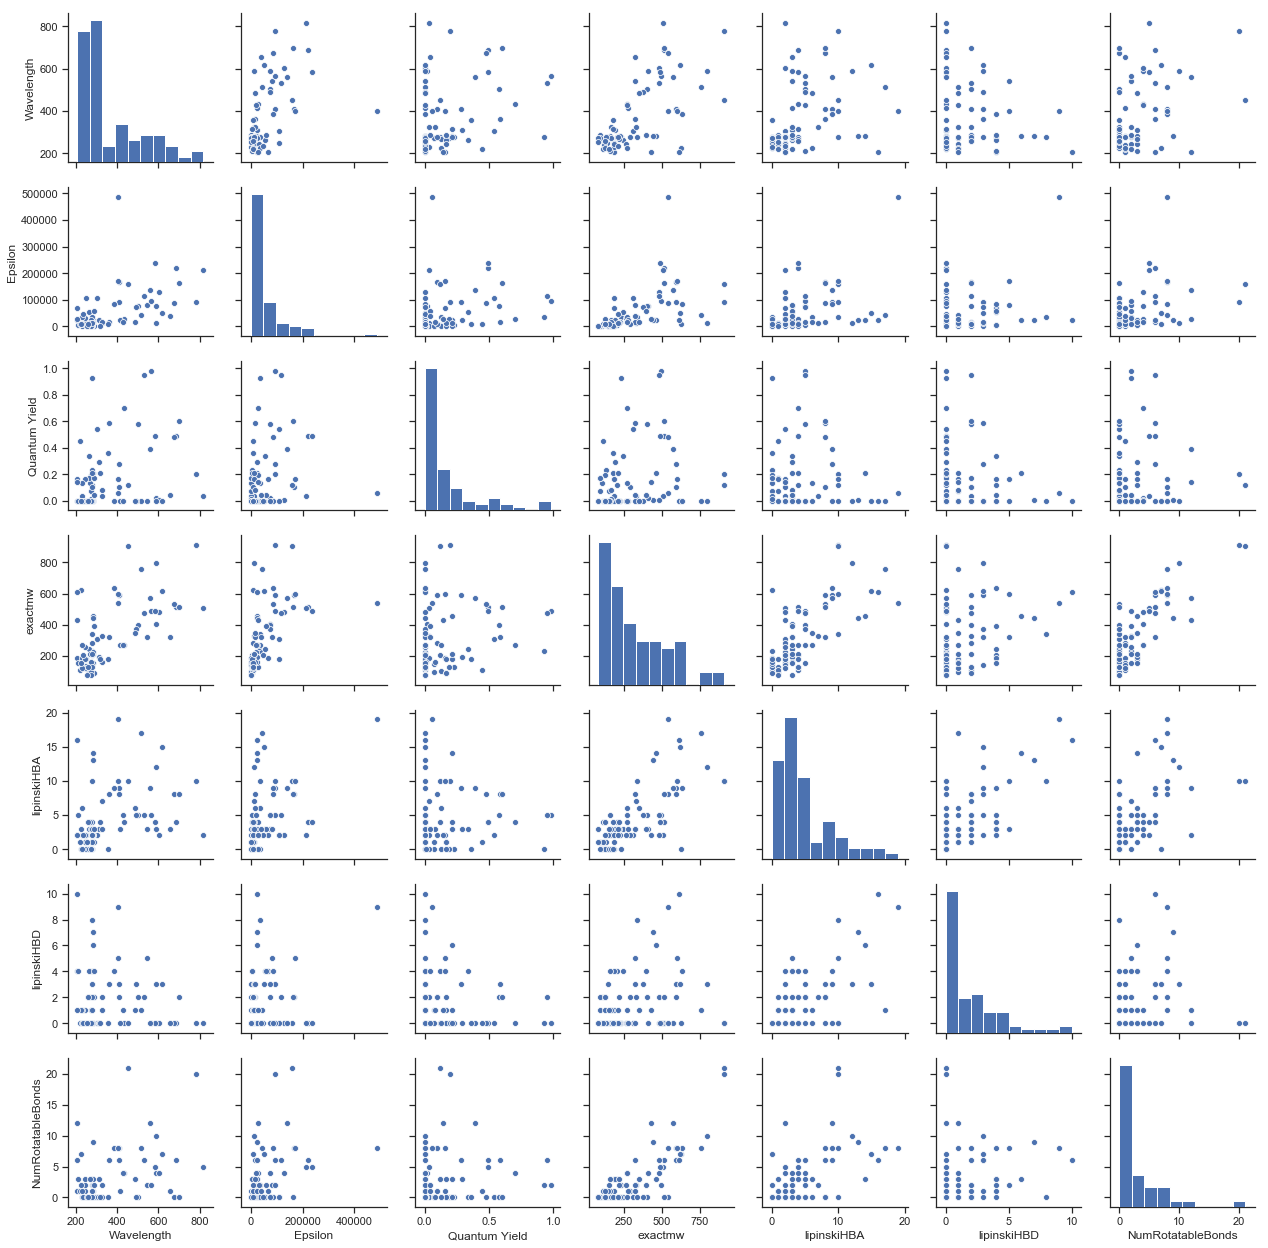

In [26]:
sns.pairplot(df_sample, vars=['Wavelength','Epsilon','Quantum Yield','exactmw','lipinskiHBA','lipinskiHBD','NumRotatableBonds' ])

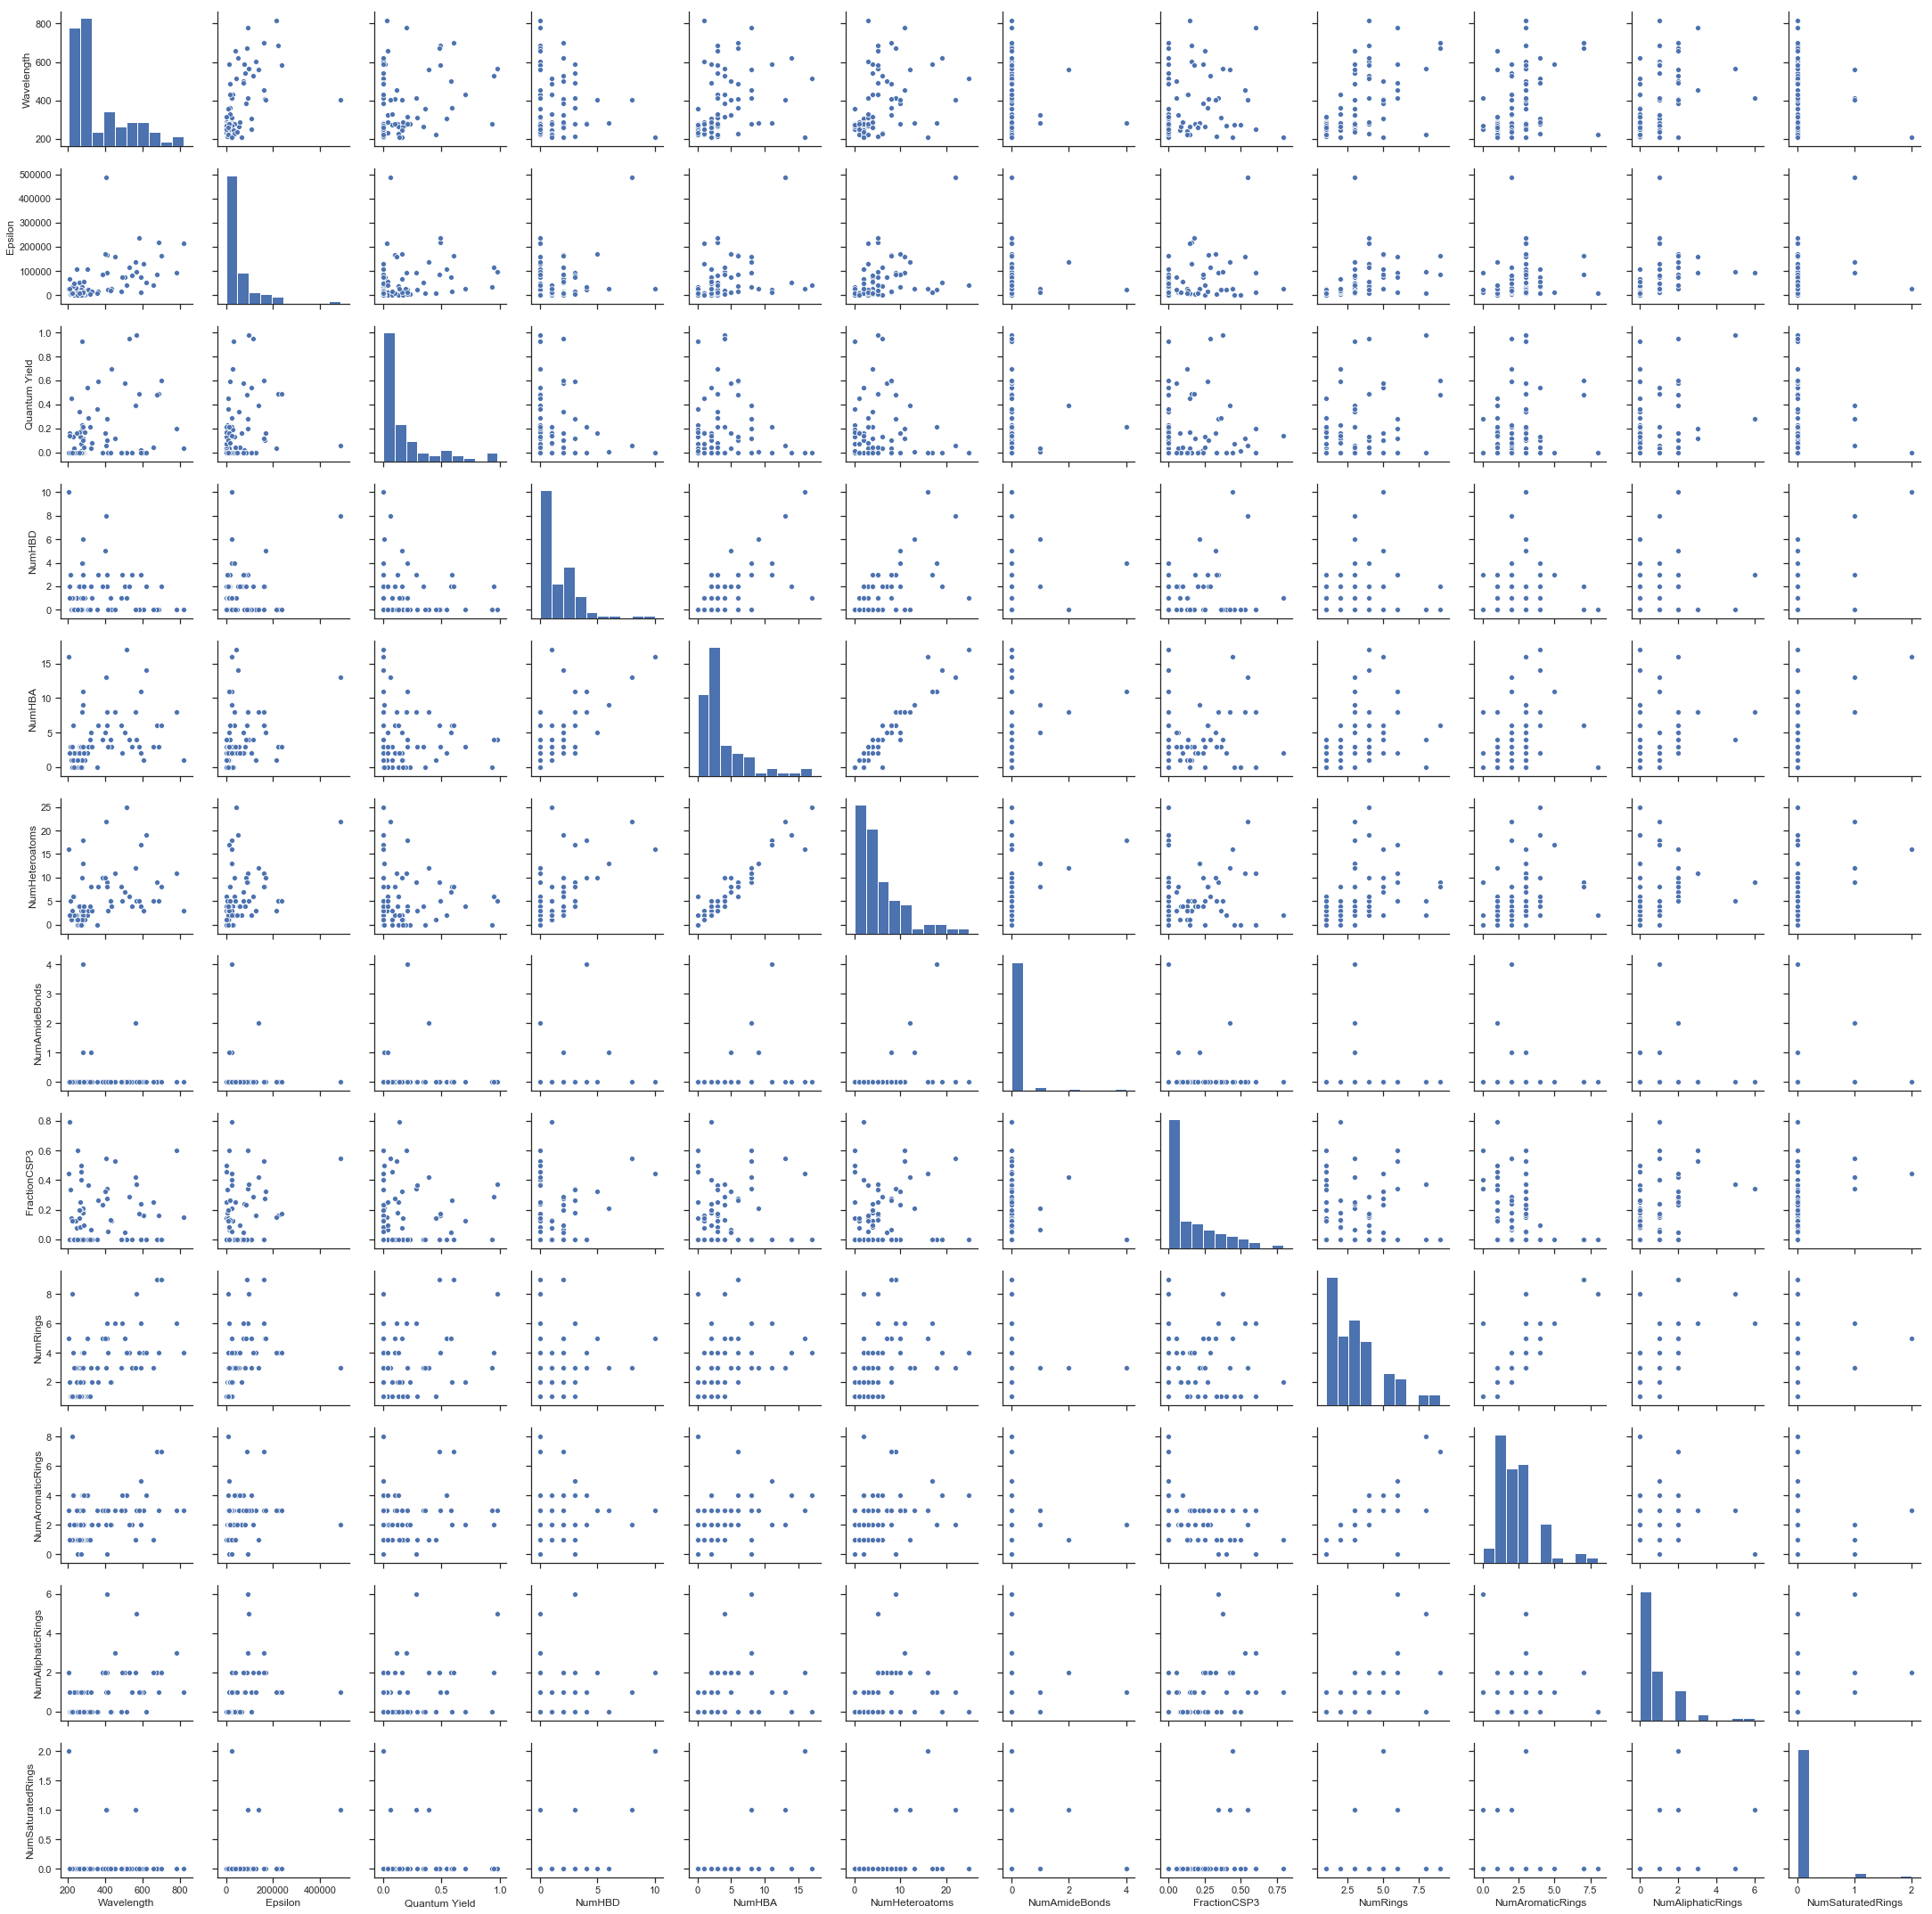

In [27]:
sns.pairplot(df_sample, vars=['Wavelength','Epsilon','Quantum Yield','NumHBD','NumHBA', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings','NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings'])

'NumSaturatedRings', 'NumAliphaticRings','NumAromaticRings','NumRings' might have dependency
and should be categorized

'NumAmideBonds' should drop, no correlation shown, mostly 0

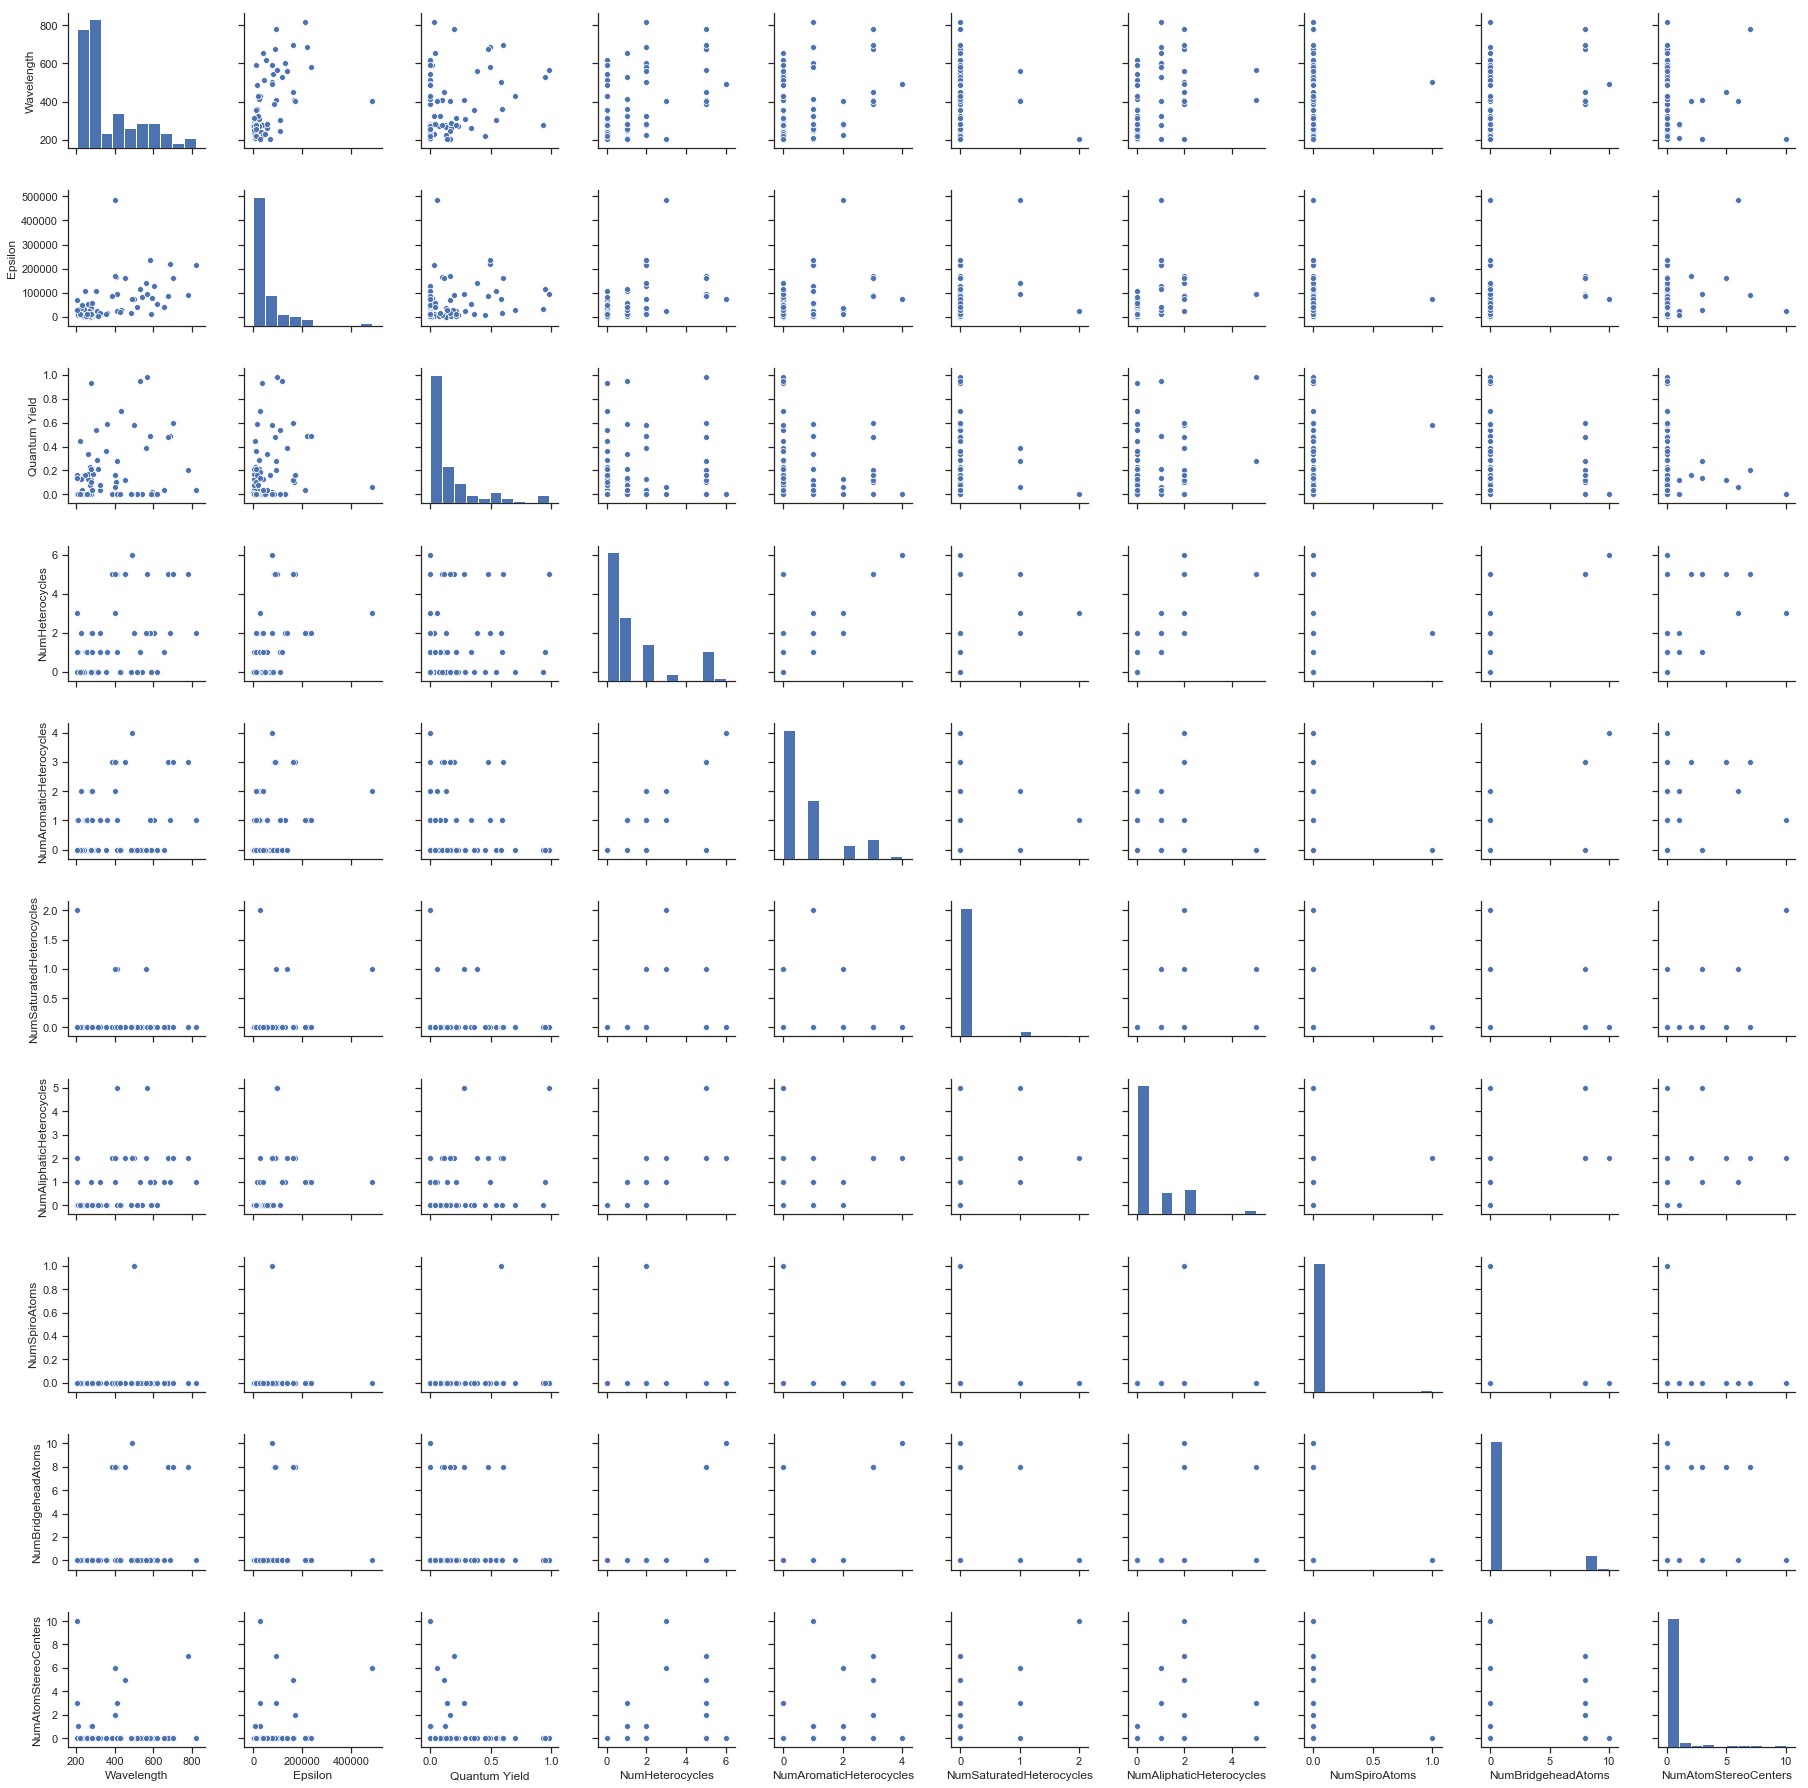

In [28]:
sns.pairplot(df_sample, vars=['Wavelength','Epsilon','Quantum Yield','NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters'])

In [ ]:
SOME DEPENDENCY IN THIS SET OF VARIABLES

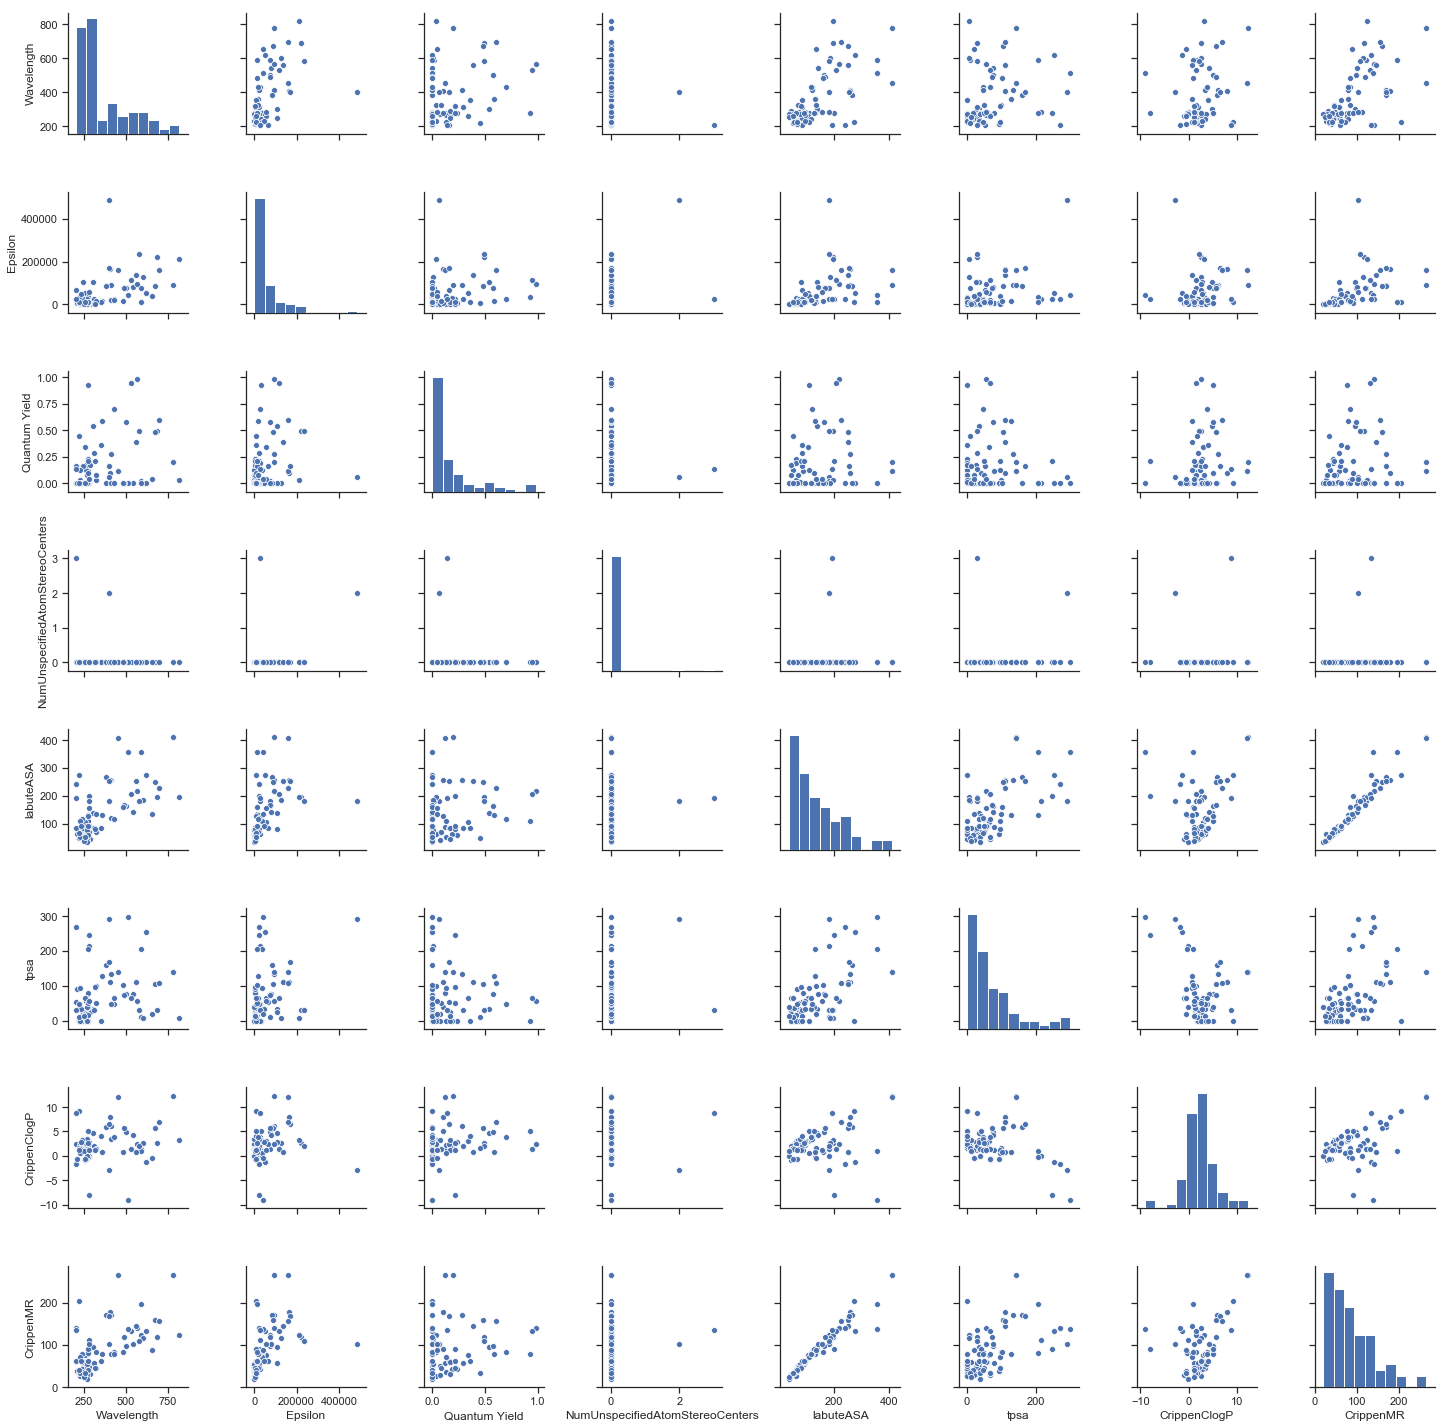

In [29]:
sns.pairplot(df_sample, vars=['Wavelength','Epsilon','Quantum Yield','NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR'])

drop 'NumUnspecifiedAtomStereoCenters'

### Try first NN

In [44]:
y_wl = df_prop[df_sample.columns[3]].values

In [50]:
X = df_prop[df_sample.columns[6:]].drop(['NumAmideBonds','NumSaturatedRings','NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters'],axis=1).values

In [ ]:
X= df_prop

In [53]:
X_train, X_test, y_train, y_test = dutls.DataUtils.splitData(X,y_wl,0.2)

In [59]:
X_train.shape

(213, 16)

In [98]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [31]:
from keras import regularizers
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

In [62]:
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(16,)))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               6800      
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
__________

In [99]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[coeff_determination])
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=[X_test, y_test])


Train on 213 samples, validate on 54 samples
Epoch 1/300
213/213 [==============================] - 1s 3ms/step - loss: 13287.8890 - coeff_determination: 0.3681 - val_loss: 12423.5311 - val_coeff_determination: 0.1038
Epoch 2/300
213/213 [==============================] - 0s 195us/step - loss: 11777.2860 - coeff_determination: 0.4556 - val_loss: 12197.9750 - val_coeff_determination: 0.1239
Epoch 3/300
213/213 [==============================] - 0s 206us/step - loss: 11904.9414 - coeff_determination: 0.4315 - val_loss: 13183.7614 - val_coeff_determination: 0.0361
Epoch 4/300
213/213 [==============================] - 0s 201us/step - loss: 15204.0423 - coeff_determination: 0.2725 - val_loss: 11851.4625 - val_coeff_determination: 0.1611
Epoch 5/300
213/213 [==============================] - 0s 225us/step - loss: 11611.7343 - coeff_determination: 0.4558 - val_loss: 11951.3351 - val_coeff_determination: 0.1391
Epoch 6/300
213/213 [==============================] - 0s 229us/step - loss: 10521

213/213 [==============================] - 0s 159us/step - loss: 9827.1977 - coeff_determination: 0.5416 - val_loss: 12035.3396 - val_coeff_determination: 0.1401
Epoch 94/300
213/213 [==============================] - 0s 183us/step - loss: 8714.7456 - coeff_determination: 0.5879 - val_loss: 12213.7544 - val_coeff_determination: 0.1099
Epoch 95/300
213/213 [==============================] - 0s 164us/step - loss: 12574.2215 - coeff_determination: 0.3846 - val_loss: 12330.2493 - val_coeff_determination: 0.0987
Epoch 96/300
213/213 [==============================] - 0s 201us/step - loss: 9532.5329 - coeff_determination: 0.5574 - val_loss: 12616.4168 - val_coeff_determination: 0.0842
Epoch 97/300
213/213 [==============================] - 0s 169us/step - loss: 10392.7193 - coeff_determination: 0.5154 - val_loss: 11807.2819 - val_coeff_determination: 0.1651
Epoch 98/300
213/213 [==============================] - 0s 206us/step - loss: 11850.4833 - coeff_determination: 0.4009 - val_loss: 12093

213/213 [==============================] - 0s 201us/step - loss: 12163.7825 - coeff_determination: 0.4580 - val_loss: 13144.2338 - val_coeff_determination: 0.0416
Epoch 186/300
213/213 [==============================] - 0s 159us/step - loss: 9385.6289 - coeff_determination: 0.5027 - val_loss: 12932.8792 - val_coeff_determination: 0.0753
Epoch 187/300
213/213 [==============================] - 0s 178us/step - loss: 11970.6043 - coeff_determination: 0.4326 - val_loss: 13747.2716 - val_coeff_determination: -0.0152
Epoch 188/300
213/213 [==============================] - 0s 187us/step - loss: 12980.0479 - coeff_determination: 0.3816 - val_loss: 12531.1806 - val_coeff_determination: 0.1352
Epoch 189/300
213/213 [==============================] - 0s 197us/step - loss: 11615.1432 - coeff_determination: 0.4647 - val_loss: 12220.9099 - val_coeff_determination: 0.1410
Epoch 190/300
213/213 [==============================] - 0s 187us/step - loss: 10563.0217 - coeff_determination: 0.5045 - val_los

213/213 [==============================] - 0s 155us/step - loss: 10259.5882 - coeff_determination: 0.5267 - val_loss: 11087.0230 - val_coeff_determination: 0.1914
Epoch 278/300
213/213 [==============================] - 0s 150us/step - loss: 10192.0614 - coeff_determination: 0.5453 - val_loss: 11428.0748 - val_coeff_determination: 0.1536
Epoch 279/300
213/213 [==============================] - 0s 150us/step - loss: 11027.2279 - coeff_determination: 0.5115 - val_loss: 12288.7344 - val_coeff_determination: 0.0939
Epoch 280/300
213/213 [==============================] - 0s 178us/step - loss: 10954.0564 - coeff_determination: 0.4618 - val_loss: 12266.9243 - val_coeff_determination: 0.0953
Epoch 281/300
213/213 [==============================] - 0s 206us/step - loss: 11283.4148 - coeff_determination: 0.4912 - val_loss: 11790.1169 - val_coeff_determination: 0.1446
Epoch 282/300
213/213 [==============================] - 0s 178us/step - loss: 11809.6443 - coeff_determination: 0.4053 - val_los

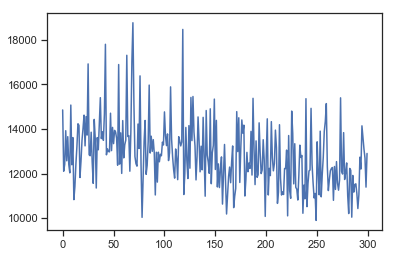

In [71]:
plt.plot(history.epoch, history.history['loss'])

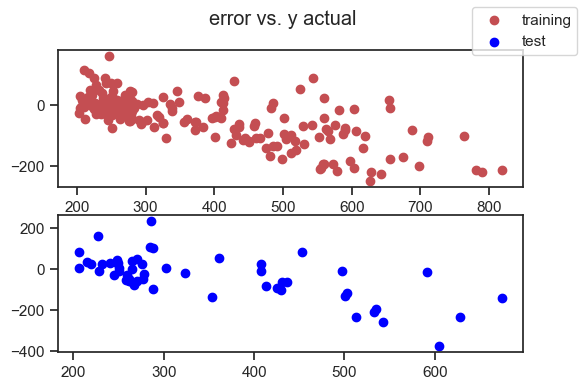

In [100]:
mutls.ModelUtils.plot_model(X_train,X_test,y_train,y_test,model)

In [72]:
import sklearn

In [73]:
from sklearn import linear_model

In [95]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

C:\Users\Yang\.conda\envs\test_speedcom\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
print(clf.coef_)

[  0.77765358  79.45506936  23.64033936 -13.62491942 -45.32243545
  -2.90479157 -16.78883256   3.94162746 -12.05297585  -0.93509689
   0.         -19.10709074   1.32994076  -3.52216883   0.65743767
  -2.06845426]


In [92]:
y_pred=clf.predict(X_train)

In [96]:
from sklearn.metrics import mean_absolute_error,r2_score

In [94]:
mean_absolute_error(y_train, y_pred)

73.00363722271632

In [97]:
r2_score(y_train,y_pred)

0.5916719622501619

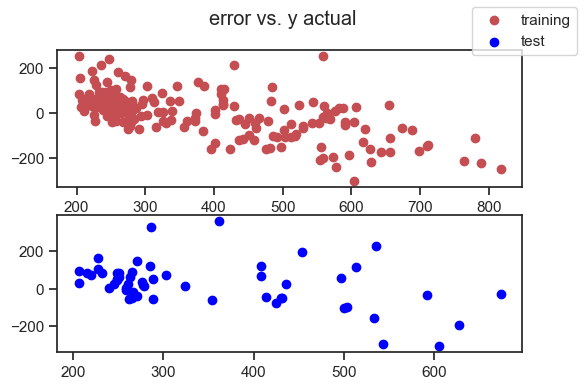

In [101]:
mutls.ModelUtils.plot_model(X_train,X_test,y_train,y_test,clf)

#### Pick only 5-6 property as X

In [8]:
X = df_prop[['exactmw','lipinskiHBA','NumHeteroatoms','labuteASA', 'tpsa', 'CrippenClogP','CrippenMR']].values

In [10]:
y_wl = df_prop[df_prop.columns[3]].values

In [11]:
X_train, X_test, y_train, y_test = dutls.DataUtils.splitData(X,y_wl,0.2)

In [29]:
X_train.shape

(213, 7)

In [38]:
model = Sequential()
model.add(Dense(400, input_shape=(7,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 400)               3200      
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
activation_3 (Activation)    (None, 400)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_8 (Batch (None, 200)               800       
_________________________________________________________________
dropout_22 (Dropout)         (None, 200)               0         
__________

In [39]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=[X_test, y_test])


Train on 213 samples, validate on 54 samples
Epoch 1/300
213/213 [==============================] - 2s 8ms/step - loss: 160902.1237 - mean_absolute_error: 371.9989 - val_loss: 136098.2052 - val_mean_absolute_error: 347.0927
Epoch 2/300
213/213 [==============================] - 0s 225us/step - loss: 160240.3180 - mean_absolute_error: 371.5586 - val_loss: 135611.4442 - val_mean_absolute_error: 346.4504
Epoch 3/300
213/213 [==============================] - 0s 253us/step - loss: 159615.0890 - mean_absolute_error: 370.8050 - val_loss: 135104.6852 - val_mean_absolute_error: 345.8309
Epoch 4/300
213/213 [==============================] - 0s 220us/step - loss: 159052.2869 - mean_absolute_error: 370.1247 - val_loss: 134400.8987 - val_mean_absolute_error: 344.9322
Epoch 5/300
213/213 [==============================] - 0s 248us/step - loss: 158377.4416 - mean_absolute_error: 369.4417 - val_loss: 133609.6105 - val_mean_absolute_error: 343.9482
Epoch 6/300
213/213 [==============================]

213/213 [==============================] - 0s 276us/step - loss: 49331.9318 - mean_absolute_error: 199.0295 - val_loss: 32635.0033 - val_mean_absolute_error: 157.3328
Epoch 47/300
213/213 [==============================] - 0s 243us/step - loss: 48555.0491 - mean_absolute_error: 197.1598 - val_loss: 25348.1345 - val_mean_absolute_error: 141.3550
Epoch 48/300
213/213 [==============================] - 0s 248us/step - loss: 44562.8012 - mean_absolute_error: 186.9682 - val_loss: 25518.2119 - val_mean_absolute_error: 143.1085
Epoch 49/300
213/213 [==============================] - 0s 267us/step - loss: 41128.8665 - mean_absolute_error: 179.6607 - val_loss: 23796.9374 - val_mean_absolute_error: 139.5125
Epoch 50/300
213/213 [==============================] - 0s 229us/step - loss: 40979.5989 - mean_absolute_error: 179.4281 - val_loss: 21116.4089 - val_mean_absolute_error: 131.6191
Epoch 51/300
213/213 [==============================] - 0s 272us/step - loss: 35233.6360 - mean_absolute_error: 1

Epoch 92/300
213/213 [==============================] - 0s 220us/step - loss: 15397.1957 - mean_absolute_error: 98.3984 - val_loss: 12121.2785 - val_mean_absolute_error: 86.9481
Epoch 93/300
213/213 [==============================] - 0s 192us/step - loss: 17828.0872 - mean_absolute_error: 102.9636 - val_loss: 14679.6054 - val_mean_absolute_error: 95.6055
Epoch 94/300
213/213 [==============================] - 0s 276us/step - loss: 18856.4506 - mean_absolute_error: 108.8882 - val_loss: 13809.5453 - val_mean_absolute_error: 95.0485
Epoch 95/300
213/213 [==============================] - 0s 229us/step - loss: 15746.6287 - mean_absolute_error: 101.1559 - val_loss: 12578.1488 - val_mean_absolute_error: 90.8009
Epoch 96/300
213/213 [==============================] - 0s 253us/step - loss: 17613.7407 - mean_absolute_error: 105.1228 - val_loss: 11981.8810 - val_mean_absolute_error: 88.1878
Epoch 97/300
213/213 [==============================] - 0s 220us/step - loss: 18293.7040 - mean_absolute_e

Epoch 138/300
213/213 [==============================] - 0s 276us/step - loss: 15002.3923 - mean_absolute_error: 92.1493 - val_loss: 12276.7906 - val_mean_absolute_error: 86.4994
Epoch 139/300
213/213 [==============================] - 0s 286us/step - loss: 16656.6814 - mean_absolute_error: 97.3987 - val_loss: 12780.6894 - val_mean_absolute_error: 87.2346
Epoch 140/300
213/213 [==============================] - 0s 262us/step - loss: 16413.6815 - mean_absolute_error: 100.9521 - val_loss: 12331.4622 - val_mean_absolute_error: 86.7088
Epoch 141/300
213/213 [==============================] - 0s 272us/step - loss: 14677.8809 - mean_absolute_error: 93.6957 - val_loss: 11924.3966 - val_mean_absolute_error: 83.7418
Epoch 142/300
213/213 [==============================] - 0s 333us/step - loss: 15704.5609 - mean_absolute_error: 97.6274 - val_loss: 12034.8495 - val_mean_absolute_error: 84.4266
Epoch 143/300
213/213 [==============================] - 0s 276us/step - loss: 14534.8432 - mean_absolut

Epoch 184/300
213/213 [==============================] - 0s 239us/step - loss: 15097.6165 - mean_absolute_error: 91.6926 - val_loss: 11216.1931 - val_mean_absolute_error: 77.5346
Epoch 185/300
213/213 [==============================] - 0s 253us/step - loss: 16401.5084 - mean_absolute_error: 95.4241 - val_loss: 11656.6445 - val_mean_absolute_error: 80.6257
Epoch 186/300
213/213 [==============================] - 0s 272us/step - loss: 15693.0603 - mean_absolute_error: 98.9454 - val_loss: 10960.2544 - val_mean_absolute_error: 80.3763
Epoch 187/300
213/213 [==============================] - 0s 300us/step - loss: 15730.0148 - mean_absolute_error: 98.3072 - val_loss: 11892.5711 - val_mean_absolute_error: 84.0803
Epoch 188/300
213/213 [==============================] - 0s 211us/step - loss: 17573.1282 - mean_absolute_error: 101.1698 - val_loss: 14037.8297 - val_mean_absolute_error: 89.8012
Epoch 189/300
213/213 [==============================] - 0s 201us/step - loss: 13992.6656 - mean_absolut

Epoch 230/300
213/213 [==============================] - 0s 201us/step - loss: 13908.4334 - mean_absolute_error: 93.2793 - val_loss: 9340.6131 - val_mean_absolute_error: 79.6502
Epoch 231/300
213/213 [==============================] - 0s 206us/step - loss: 11443.8750 - mean_absolute_error: 80.7099 - val_loss: 9080.9456 - val_mean_absolute_error: 77.5609
Epoch 232/300
213/213 [==============================] - 0s 225us/step - loss: 12880.5711 - mean_absolute_error: 87.5987 - val_loss: 10252.0851 - val_mean_absolute_error: 80.3075
Epoch 233/300
213/213 [==============================] - 0s 229us/step - loss: 15276.7951 - mean_absolute_error: 97.4405 - val_loss: 11399.3505 - val_mean_absolute_error: 84.1074
Epoch 234/300
213/213 [==============================] - 0s 239us/step - loss: 14260.2604 - mean_absolute_error: 89.2946 - val_loss: 13016.5226 - val_mean_absolute_error: 88.8021
Epoch 235/300
213/213 [==============================] - 0s 234us/step - loss: 13172.0811 - mean_absolute_e

Epoch 276/300
213/213 [==============================] - 0s 272us/step - loss: 12854.0133 - mean_absolute_error: 88.6697 - val_loss: 9588.3301 - val_mean_absolute_error: 73.7111
Epoch 277/300
213/213 [==============================] - 0s 267us/step - loss: 17803.2775 - mean_absolute_error: 103.5783 - val_loss: 8682.2493 - val_mean_absolute_error: 69.5586
Epoch 278/300
213/213 [==============================] - 0s 272us/step - loss: 12487.1495 - mean_absolute_error: 81.3936 - val_loss: 8433.3765 - val_mean_absolute_error: 68.9763
Epoch 279/300
213/213 [==============================] - 0s 262us/step - loss: 13036.0442 - mean_absolute_error: 88.9105 - val_loss: 8747.3741 - val_mean_absolute_error: 70.7366
Epoch 280/300
213/213 [==============================] - 0s 234us/step - loss: 12036.1268 - mean_absolute_error: 85.1292 - val_loss: 9100.0145 - val_mean_absolute_error: 72.6089
Epoch 281/300
213/213 [==============================] - 0s 258us/step - loss: 11879.9990 - mean_absolute_err

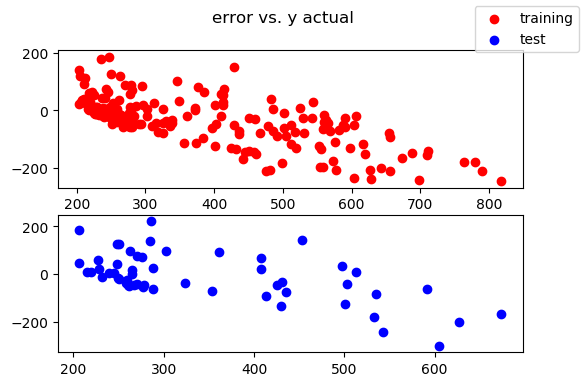

In [40]:
mutls.ModelUtils.plot_model(X_train,X_test, y_train, y_test,model)

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,r2_score
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_train)

C:\Users\Yang\.conda\envs\test_speedcom\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [44]:
r2_score(y_train,y_pred)

0.5600590553429894

In [45]:
mean_absolute_error(y_train,y_pred)

73.5445100697068